<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-I/blob/main/fourier_generalizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fourier generalizada**

a)Verificar que el siguiente es un problema de Sturm-Liouville y resolverlo:

$$f''(x) + 2 f'(x) + \lambda f(x) =0,  \text{  } 0 < x < 1 $$

$$f(0) = 0, \text{ } f(1) = 0 $$

b) Usar las eigenfunciones de este problema para expandir en series de Fourier generalizadas la función:

$$u(x) = e^{-x}, \text{ } 0 \leq x \leq 1$$


In [ ]:
#Importar librerias
from sympy import *
import sympy as sp
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#utilizamos f, x, k, definimos
x = sp.symbols('x')
k = sp.symbols('k', positive=True)  #Definimos lambda positiva
f = sp.Function('f')
#si el problema hubiera sido f"(x)+ 2*f'(x) +k*f(x) =0

In [ ]:
ode1 = sp.Eq(sp.Derivative(f(x), x, x) +  2 * sp.Derivative(f(x), x) + k * f(x), 0)
sol1 = sp.dsolve(ode1, f(x))  # Solución general
C1, C2 = sp.symbols('C1 C2')

#print(ode1)
sol1

Eq(f(x), C1*exp(x*(sqrt(1 - k) - 1)) + C2*exp(-x*(sqrt(1 - k) + 1)))

In [ ]:
#Condiciones de frontera del problema 1
#f(0)=0, f(1)=0
cond1 = sol1.rhs.subs(x, 0)
cond2 = sol1.rhs.subs(x, 1)

In [ ]:
const = sp.solve([cond1, cond2], [C1, C2])

const


{C1: 0, C2: 0}

In [ ]:
#Resolvemos para x(1-k)**1/2 -1
valor_n = [1, 2, 3]

valor_k=[]
for n in valor_n:
    valor_k.append(1 + ((n)*(pi))**2)
print("Los valores de k=", valor_k)

Los valores de k= [1 + pi**2, 1 + 4*pi**2, 1 + 9*pi**2]


In [ ]:
#f(x)=(e**-x)*sen(n*pi*x), evaluamos en los valores de n, que son 1,3 y 5
sens1=[]
for n in valor_n:
    sens1.append((exp(-x))*sin(n * pi * x))
print(sens1)

[exp(-x)*sin(pi*x), exp(-x)*sin(2*pi*x), exp(-x)*sin(3*pi*x)]


**Lo intenté con mi código pasado y es lo mejor que pude, fue confuso,pero un compañere me paso el siguiente, es un mensaje para el Profesor Oompa Loompa. Perdonenbme por copiar, lo intentaré después**

In [34]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

#Variables simbólicas
x, lam = sp.symbols('x lambda', real=True)
f = sp.Function('f')

#Resolver la ecuación diferencial

f_general = sp.dsolve(f(x).diff(x, 2) + 2*f(x).diff(x) + lam*f(x), f(x))
print("Solución general de la EDO:")
sp.pprint(f_general)

#Asumir f(x) = e^{-x}*y(x), que elimina el término de primer orden
y = sp.Function('y')
substituted = sp.dsolve(sp.diff(y(x), x, 2) + (lam - 1)*y(x), y(x))
print("\nSolución reducida por sustitución f = e^{-x}*y:")
sp.pprint(substituted)


Solución general de la EDO:
             ⎛  _______    ⎞          ⎛  _______    ⎞
           x⋅⎝╲╱ 1 - λ  - 1⎠       -x⋅⎝╲╱ 1 - λ  + 1⎠
f(x) = C₁⋅ℯ                  + C₂⋅ℯ                  

Solución reducida por sustitución f = e^{-x}*y:
                _______           _______
           -x⋅╲╱ 1 - λ        x⋅╲╱ 1 - λ 
y(x) = C₁⋅ℯ             + C₂⋅ℯ           



Coeficiente general a_n:
  ⎛        n⎞
2⋅⎝1 - (-1) ⎠
─────────────
     π⋅n     


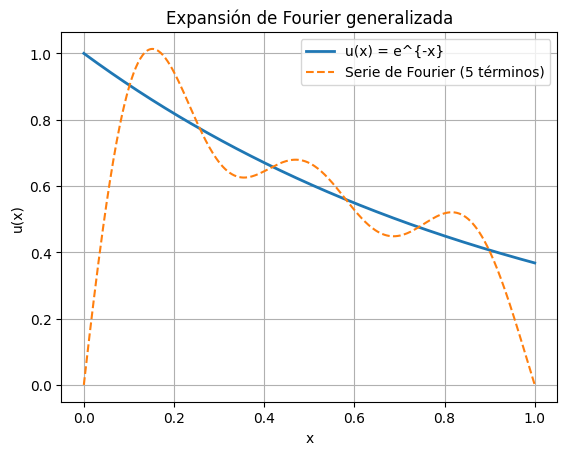

In [35]:

# La solución general es: f(x) = e^{-x}(C1*sin(mu*x) + C2*cos(mu*x)), con mu = sqrt(lambda - 1)

# Aplicar condiciones de frontera:
mu = sp.symbols('mu', positive=True, real=True)
C1, C2 = sp.symbols('C1 C2')
f_expr = sp.exp(-x) * (C1*sp.sin(mu*x) + C2*sp.cos(mu*x))

# f(0) = 0 => C2 = 0
f_expr = f_expr.subs(C2, 0)

# f(1) = 0 => sin(mu) = 0 => mu = n*pi
n = sp.symbols('n', integer=True, positive=True)
mu_n = n*sp.pi
lambda_n = 1 + mu_n**2

# Eigenfunciones:
phi_n = sp.exp(-x)*sp.sin(mu_n*x)

# Parte (b): Expandir u(x) = e^{-x} en serie generalizada de Fourier
u = sp.exp(-x)
r = sp.exp(2*x) # peso r(x) = e^{2x}

# Calcular coeficientes a_n = <u, phi_n> / <phi_n, phi_n>
def inner_product(f1, f2):
    return sp.integrate(f1 * f2 * r, (x, 0, 1))

a_n = inner_product(u, phi_n) / inner_product(phi_n, phi_n)
a_n_simplified = sp.simplify(a_n)
print("\nCoeficiente general a_n:")
sp.pprint(a_n_simplified)

# Visualización
# Graficar los primeros 5 términos de la serie de Fourier
f_fourier = sum([
a_n_simplified.subs(n, i) * phi_n.subs(n, i)
for i in range(1, 6)
])
f_fourier_func = sp.lambdify(x, f_fourier, 'numpy')
u_func = sp.lambdify(x, u, 'numpy')

x_vals = np.linspace(0, 1, 400)
plt.plot(x_vals, u_func(x_vals), label='u(x) = e^{-x}', linewidth=2)
plt.plot(x_vals, f_fourier_func(x_vals), label='Serie de Fourier (5 términos)', linestyle='--')
plt.legend()
plt.title("Expansión de Fourier generalizada")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.show()